### Import Dependencies
Standard Python libraries used for -------------

In [1]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

### Data Ingestion
Loading the data from `credit_card_transactions.csv` and checking the initial few rows.

In [2]:
# Read the CSV file into a dataframe
data = pd.read_csv('credit_card_transactions.csv')

# Display the first few records
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


### Data Exploration
#### Explore the dataframe to assess for necessary pre-processing steps like null value handling and feature engineering 

In [3]:
# Explore data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# function to get number of unique values for each column ..
# to determine what kind of encoding and imputation needs to be done!

def display_unique_values(data):
    """
    Display unique values and the number of unique values for each column in the dataframe.

    Parameters:
    data (pd.DataFrame): The dataframe to analyze.

    Returns:
    None
    """
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Column: {column}")
        print(f"Data Type: {data[column].dtype}")
        print(f"Number of Unique Values: {len(unique_values)}")
        print(f"Unique Values: {unique_values[:10]}...")  # Show the first 10 unique values for brevity
        print("-" * 50)

# Display details of each column:
display_unique_values(data)

Column: Unnamed: 0
Data Type: int64
Number of Unique Values: 1296675
Unique Values: [0 1 2 3 4 5 6 7 8 9]...
--------------------------------------------------
Column: trans_date_trans_time
Data Type: object
Number of Unique Values: 1274791
Unique Values: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51'
 '2019-01-01 00:01:16' '2019-01-01 00:03:06' '2019-01-01 00:04:08'
 '2019-01-01 00:04:42' '2019-01-01 00:05:08' '2019-01-01 00:05:18'
 '2019-01-01 00:06:01']...
--------------------------------------------------
Column: cc_num
Data Type: int64
Number of Unique Values: 983
Unique Values: [2703186189652095     630423337322   38859492057661 3534093764340240
  375534208663984 4767265376804500   30074693890476 6011360759745864
 4922710831011201 2720830304681674]...
--------------------------------------------------
Column: merchant
Data Type: object
Number of Unique Values: 693
Unique Values: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckr

### Data Cleaning
Cleaning and preprocessing the dataset by removing unnecessary columns and converting date columns.

In [5]:
# Make a copy for transformation
ak_df = data.copy()

# Convert date columns to datetime format
ak_df['trans_date_trans_time'] = pd.to_datetime(ak_df['trans_date_trans_time'])
ak_df['dob'] = pd.to_datetime(ak_df['dob'])

## DataFrame Sorting
* we will be doing the datasplitting based on timeseries, that is why it is important to sort the dataframe

In [6]:
# Sort the dataframe by 'trans_date_trans_time' in ascending order
data = data.sort_values(by='trans_date_trans_time', ascending=True)

# Reset the index after sorting
data.reset_index(drop=True, inplace=True)

# Verify the sorting
print(data[['trans_date_trans_time']].head())  # Display the first few rows to confirm sorting

  trans_date_trans_time
0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06


#### Feature Engineering - Age Patterns

In [7]:
# AGE - Calculate age based on DOB and transaction year
ak_df['ft_age'] = ak_df['trans_date_trans_time'].dt.year - ak_df['dob'].dt.year

# AGE SEGMENT - Define age segments
def age_segment(age):
    if age < 18:
        return 'Under 18'
    elif 19 <= age <= 28:
        return '19-28'
    elif 29 <= age <= 38:
        return '29-38'
    elif 39 <= age <= 48:
        return '39-48'
    elif 49 <= age <= 58:
        return '49-58'
    elif 59 <= age <= 68:
        return '59-68'
    elif 69 <= age <= 78:
        return '69-78'
    else:
        return '79+'

# Apply age segmentation
ak_df['ft_age_group'] = ak_df['ft_age'].apply(age_segment)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,ft_age,ft_age_group
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,31,29-38
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,41,39-48
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,57,49-58
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,52,49-58
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,33,29-38


#### Feature Engineering - Temporal Patterns

In [8]:
# TRANSACTION HOUR
ak_df['ft_trans_hour'] = ak_df['trans_date_trans_time'].dt.hour

# TIME OF DAY - Categorize time of day based on transaction hour
ak_df['ft_time_of_day'] = ak_df['trans_date_trans_time'].dt.hour.apply(
    lambda hour: 'Morning' if 6 <= hour < 12 else
    ('Afternoon' if 12 <= hour < 18 else
    ('Evening' if 18 <= hour < 24 else 'Night'))
)

# TRANSACTION DAY
ak_df['ft_trans_day'] = ak_df['trans_date_trans_time'].dt.day

# TRANSACTION DAY OF YEAR
ak_df['ft_trans_day_of_year'] = ak_df['trans_date_trans_time'].dt.dayofyear

# TRANSACTION MONTH
ak_df['ft_trans_month'] = ak_df['trans_date_trans_time'].dt.month

# TRANSACTION YEAR - Add a new column 'ft_trans_year' to represent the year of the transaction
ak_df['ft_trans_year'] = ak_df['trans_date_trans_time'].dt.year

# DAY OF WEEK - Add a new column 'day_of_week' to represent the day of the week (0=Monday, 6=Sunday)
ak_df['ft_day_of_week'] = ak_df['trans_date_trans_time'].dt.day_name()


ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_zipcode,ft_age,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,28705.0,31,29-38,0,Night,1,1,1,2019,Tuesday
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,NaN,41,39-48,0,Night,1,1,1,2019,Tuesday
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,83236.0,57,49-58,0,Night,1,1,1,2019,Tuesday
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,NaN,52,49-58,0,Night,1,1,1,2019,Tuesday
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,22844.0,33,29-38,0,Night,1,1,1,2019,Tuesday


#### Feature Engineering - Distance Patterns
* Distance between user and merchant for the transaction
* Large deviations in the transaction’s location compared to the user’s regular pattern could indicate fraud

In [9]:
# DISTANCE BETWEEN USER AND MERCHANT

import numpy as np

# Define the Haversine Formula function that calculates the distance given two latitude/longitude points
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Radius of Earth in kilometers
    return radius * c

# Create a new column for distance
ak_df['ft_distance_user_merchant'] = haversine(
    ak_df['lat'], ak_df['long'],
    ak_df['merch_lat'], ak_df['merch_long']
)

# Calculate the average distance of previous transactions for a user and compare the current transaction distance
user_avg_distance = ak_df.groupby('cc_num')['ft_distance_user_merchant'].transform('mean')
ak_df['ft_merchant_distance_from_user_mean'] = ak_df['ft_distance_user_merchant'] - user_avg_distance


ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,29-38,0,Night,1,1,1,2019,Tuesday,78.597568,0.637376
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,39-48,0,Night,1,1,1,2019,Tuesday,30.212176,-41.580370
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,49-58,0,Night,1,1,1,2019,Tuesday,108.206083,34.130756
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,49-58,0,Night,1,1,1,2019,Tuesday,95.673231,23.971060
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,29-38,0,Night,1,1,1,2019,Tuesday,77.556744,2.322402


#### Feature Engineering - Merchant Popularity
* Uncommon merchants with a low transaction count might be associated with fraud

In [10]:
# Count the number of transactions for each merchant in the dataset
merchant_transaction_counts = ak_df['merchant'].value_counts()
ak_df['ft_merchant_popularity'] = ak_df['merchant'].map(merchant_transaction_counts)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,Night,1,1,1,2019,Tuesday,78.597568,0.637376,1267
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,Night,1,1,1,2019,Tuesday,30.212176,-41.580370,2503
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,Night,1,1,1,2019,Tuesday,108.206083,34.130756,1895
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,Night,1,1,1,2019,Tuesday,95.673231,23.971060,2613
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,Night,1,1,1,2019,Tuesday,77.556744,2.322402,1592


#### Feature Engineering - User Spending Behavior: Mean Transaction Amount (mean_amt_per_user)
* Transactions significantly above or below the user’s average spending pattern may indicate fraud

In [11]:
# Calculate the mean transaction amount for each user (cc_num)
user_mean_amt = ak_df.groupby('cc_num')['amt'].transform('mean')
ak_df['ft_mean_amt_per_user'] = user_mean_amt

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,Night,1,1,1,2019,Tuesday,78.597568,0.637376,1267,87.393215
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Night,1,1,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Night,1,1,1,2019,Tuesday,108.206083,34.130756,1895,65.870040
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Night,1,1,1,2019,Tuesday,95.673231,23.971060,2613,72.776673
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Night,1,1,1,2019,Tuesday,77.556744,2.322402,1592,95.178091


#### Feature Engineering - Transaction Amount Deviation (amt_deviation)
* Sudden changes in spending behavior (either very high or very low) could be a red flag

In [12]:
# Calculate the deviation of the transaction amount from the user’s mean transaction amount
ak_df['ft_amt_deviation'] = ak_df['amt'] - ak_df['ft_mean_amt_per_user']

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,1,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,1,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,1,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,1,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091


#### Feature Engineering - Transaction Frequency (transaction_count_per_user)
* Users with abnormally high transaction counts might exhibit fraudulent behavior

In [13]:
# Count the number of transactions for each user (cc_num)
user_transaction_count = ak_df['cc_num'].value_counts()
ak_df['ft_transaction_count_per_user'] = ak_df['cc_num'].map(user_transaction_count)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017


#### Feature Engineering - Fraud Rate by State (state_fraud_rate)
* States with unusually high fraud rates could signal suspicious activity

In [14]:
# Calculate the fraud rate for each state by dividing the number of fraudulent transactions by the total number of transactions
fraud_rate_by_state = ak_df.groupby('state')['is_fraud'].mean()
ak_df['ft_state_fraud_rate'] = ak_df['state'].map(fraud_rate_by_state)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769


#### Feature Engineering - Recurring Transaction Flag (is_recurring)
* Recurring transactions are less likely to be fraudulent

In [15]:
# Flag transactions as recurring if the same merchant and cc_num combination appears multiple times within a short period
ak_df['ft_transaction_is_recurring'] = ak_df.duplicated(subset=['cc_num', 'merchant'], keep=False).astype(int)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate,ft_transaction_is_recurring
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769,1


In [16]:
# lets review the current columns of the updated dataframe
ak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 41 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   Unnamed: 0                           1296675 non-null  int64         
 1   trans_date_trans_time                1296675 non-null  datetime64[ns]
 2   cc_num                               1296675 non-null  int64         
 3   merchant                             1296675 non-null  object        
 4   category                             1296675 non-null  object        
 5   amt                                  1296675 non-null  float64       
 6   first                                1296675 non-null  object        
 7   last                                 1296675 non-null  object        
 8   gender                               1296675 non-null  object        
 9   street                               1296675 non-null  ob

In [17]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'trans_num', 'lat', 
    'long', 'merch_zipcode', 'ft_age', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'zip', 'dob'
]
ak_df_cleaned = ak_df.drop(columns=columns_to_drop)

ak_df_cleaned.head()

# Check for null values
# print(ak_df_cleaned.isnull().sum())

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud,ft_age_group,...,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate,ft_transaction_is_recurring
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,29-38,...,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,39-48,...,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073,1
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,49-58,...,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984,1
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,49-58,...,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,29-38,...,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769,1


In [18]:
# Explore data columns
ak_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   merchant                             1296675 non-null  object 
 1   category                             1296675 non-null  object 
 2   amt                                  1296675 non-null  float64
 3   gender                               1296675 non-null  object 
 4   city                                 1296675 non-null  object 
 5   state                                1296675 non-null  object 
 6   city_pop                             1296675 non-null  int64  
 7   job                                  1296675 non-null  object 
 8   is_fraud                             1296675 non-null  int64  
 9   ft_age_group                         1296675 non-null  object 
 10  ft_trans_hour                        1296675 non-null  int32  
 11

## Calculate Average Fraud Detection
* Lets calculate average fraud detection as a global constant to be used in the evaluation metric
* For simplicity, we are calculating false_positive_cost to be 5% of average fraud loss

  **FUTURE IMPROVEMENT**: too many false positives can cause customer to churn
        * calculate avg customer LTV
        * calculate churn rate
        * assume (Can take business help) that 2% of customer churn due to false positives
        * calculate cost of false positives based on above calculations

In [35]:
# Filter fraudulent transactions
fraud_transactions = ak_df_cleaned[ak_df_cleaned['is_fraud'] == 1]

# Calculate average fraud loss
avg_fraud_loss = fraud_transactions['amt'].mean()

print(f"Average Fraud Loss: ${avg_fraud_loss:.2f}")

# Calculate false positive cost as 5% of avg_fraud_loss
false_positive_cost = avg_fraud_loss * 0.05

print(f"False Positive Cost (5% of Avg Fraud Loss): ${false_positive_cost:.2f}")

Average Fraud Loss: $531.32
False Positive Cost (5% of Avg Fraud Loss): $26.57


## SPlit the Data for training
* Make sure that the dataframe is already sorted, otherwise add a step to sort it now
* Instead of using standard train_test_split, we are manually splitting the data into 2 steps:

In [36]:
### ARCHIVE ###
### Standard method of splitting ###
# # Setup X and y variables
# X = ak_df_cleaned.drop(columns='is_fraud')
# y = ak_df_cleaned['is_fraud'].values.reshape(-1,1)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train.describe()

**Step1**: Split in 2 sets using iloc on the sorted dataset. This will assign latest data to testing set (which is what we want!)
  * X_train_val Set: 85%
  * X_test Set: 15%

In [37]:
# Step 1: Define the split points
train_val_size = 0.85  # 85% for train + validation
test_size = 0.15       # 15% for testing

# Compute the number of rows for train-validation and test sets
train_val_end = int(len(ak_df_cleaned) * train_val_size)

# Step 2: Split the data into train-validation and test sets
train_val_data = ak_df_cleaned.iloc[:train_val_end]
test_data = ak_df_cleaned.iloc[train_val_end:]

# Step 3: Separate features and target for train-validation and test sets
X_train_val = train_val_data.drop(columns=['is_fraud'])
y_train_val = train_val_data['is_fraud']

X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']

# Confirm the sizes of the train-validation and test splits
print(f"Train-Validation set size: {len(X_train_val)}")
print(f"Testing set size: {len(X_test)}")

Train-Validation set size: 1102173
Testing set size: 194502


**Step2**: Split train_val in 2 further sets (stratified split using train_test_split method)
  * X_train: 80%
  * X_val: 20%
#### we will be doing all our validation testing first, once we are happy with the result, we'll do the final testing

In [38]:
# Step 4: Perform a stratified split on train-validation data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    test_size=0.2,  # 20% of train_val_data for validation
    random_state=42, 
    stratify=y_train_val  # Ensures equal class distribution
)

# Step 5: Confirm the sizes and stratification of training and validation splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print('***************')
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print('***************')
print(f"Validation target distribution:\n{y_val.value_counts(normalize=True)}")
print('***************')
# Final output
print(f"Final Testing set size: {len(X_test)}")

Training set size: 881738
Validation set size: 220435
***************
Training target distribution:
is_fraud
0    0.994218
1    0.005782
Name: proportion, dtype: float64
***************
Validation target distribution:
is_fraud
0    0.994216
1    0.005784
Name: proportion, dtype: float64
***************
Final Testing set size: 194502


In [39]:
#### ARCHIVE ####
#### THIS code is if we want to simply split data based on time and % ####


# Step 1: Make sure that the dataframe is sorted
# we made sure that the data is sorted as the first step of data cleaning

# # Step 2: Define the split points
# train_size = 0.7  # 70% for training
# validation_size = 0.15  # 15% for validation
# test_size = 0.15  # 15% for testing

# # Compute the number of rows for each set
# train_end = int(len(ak_df_cleaned) * train_size)
# validation_end = train_end + int(len(ak_df_cleaned) * validation_size)

# # Step 3: Split the data
# train_data = ak_df_cleaned.iloc[:train_end]
# validation_data = ak_df_cleaned.iloc[train_end:validation_end]
# test_data = ak_df_cleaned.iloc[validation_end:]

# # Step 4: Separate features and target for each set
# X_train = train_data.drop(columns=['is_fraud'])
# y_train = train_data['is_fraud']

# X_validation = validation_data.drop(columns=['is_fraud'])
# y_validation = validation_data['is_fraud']

# X_test = test_data.drop(columns=['is_fraud'])
# y_test = test_data['is_fraud']

# # Confirm the sizes of the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_validation)}")
# print(f"Testing set size: {len(X_test)}")

## Encoding
#### Used Target Encoding to genrealise the encoding across multiple columns

In [40]:
!pip install category-encoders

python(7143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [41]:
import category_encoders as ce

# Define categorical columns to encode
categorical_columns = [
    'merchant', 'category', 'gender', 'city', 'state', 
    'job', 'ft_time_of_day', 'ft_age_group', 'ft_day_of_week'
]

# Step 1: Initialize the target encoder
encoder = ce.TargetEncoder(cols=categorical_columns)

# Step 2: Fit the encoder on the training set using y_train
X_train_encoded = encoder.fit_transform(X_train, y_train)

# Step 3: Transform the validation and test sets using the fitted encoder
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Step 4: Display the first few rows of each encoded dataset to verify
print("Encoded X_train:")
print(X_train_encoded.head(2))

print("Encoded X_val:")
print(X_val_encoded.head(2))

print("Encoded X_test:")
print(X_test_encoded.head(2))

Encoded X_train:
        merchant  category    amt    gender  city     state  city_pop  \
185602  0.002238  0.002322  26.11  0.005183   0.0  0.004416       149   
307895  0.003425  0.004680  91.11  0.005183   0.0  0.006679      1131   

             job  ft_age_group  ft_trans_hour  ...  ft_trans_year  \
185602  0.002593      0.004037             20  ...           2019   
307895  0.001572      0.006414             10  ...           2019   

        ft_day_of_week  ft_distance_user_merchant  \
185602        0.006147                  74.401415   
307895        0.006162                   5.407588   

        ft_merchant_distance_from_user_mean  ft_merchant_popularity  \
185602                             2.608869                    3434   
307895                           -68.455733                    2619   

        ft_mean_amt_per_user  ft_amt_deviation  ft_transaction_count_per_user  \
185602             53.949320        -27.839320                           3030   
307895             

## Scaling
#### Logistic Regression will require scaling, other forest models do not require scaling

In [52]:
### THIS code is not needed as we will be using only tree models ####

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train_encoded and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)
print("X_train scaled sample:")
print(X_train_scaled[:1])  # Display the first 1 row of the scaled training data

# Transform X_validation_encoded using the fitted scaler
X_validation_scaled = scaler.transform(X_val_encoded)
print("X_val scaled sample:")
print(X_validation_scaled[:1])  # Display the first 1 row of the scaled testing data

# Transform X_test_encoded using the fitted scaler
X_test_scaled = scaler.transform(X_test_encoded)
print("X_test scaled sample:")
print(X_test_scaled[:1])  # Display the first 1 row of the scaled testing data

X_train scaled sample:
[[-0.61549581 -0.63375428 -0.28469115 -0.90964565 -0.68732083 -0.92943286
  -0.29405432 -0.52665289 -1.0679967   1.05566798  0.98533649 -1.09306817
  -0.73170139 -0.64260042 -0.43804948  0.3778526  -0.05788796  0.0908494
   2.61559023 -0.84686796 -0.18052172  1.63221737 -0.2351042   0.36861074]]
X_val scaled sample:
[[-1.00424025 -0.78773539 -0.1127925  -0.90964565  0.56140651  1.06837776
   0.01364906 -0.3393634   1.19469411  1.20234265  0.98533649 -1.65466367
  -0.50765259 -0.36885615 -0.43804948  0.39340472  0.83496963  0.84570207
   0.71372699  0.03301578 -0.11779688 -0.37497623  0.36631862  0.36861074]]
X_test scaled sample:
[[ 2.00169904  2.19837752 -0.41696549  1.09932917 -0.26154145  1.61458545
   0.23146364  0.07685331 -1.0679967   0.61564395 -0.98794384 -1.43002547
  -0.74962529 -0.64260042  2.28284711  1.39896379  0.48397202  0.45805189
  -0.1843751  -0.48538644 -0.35919256  1.02062952  0.717078    0.36861074]]


## Correlation Analysis
#### Correlation Analysis to find redundancy/multi-colinearity in features

Correlation matrix saved as 'correlation_matrix.csv'


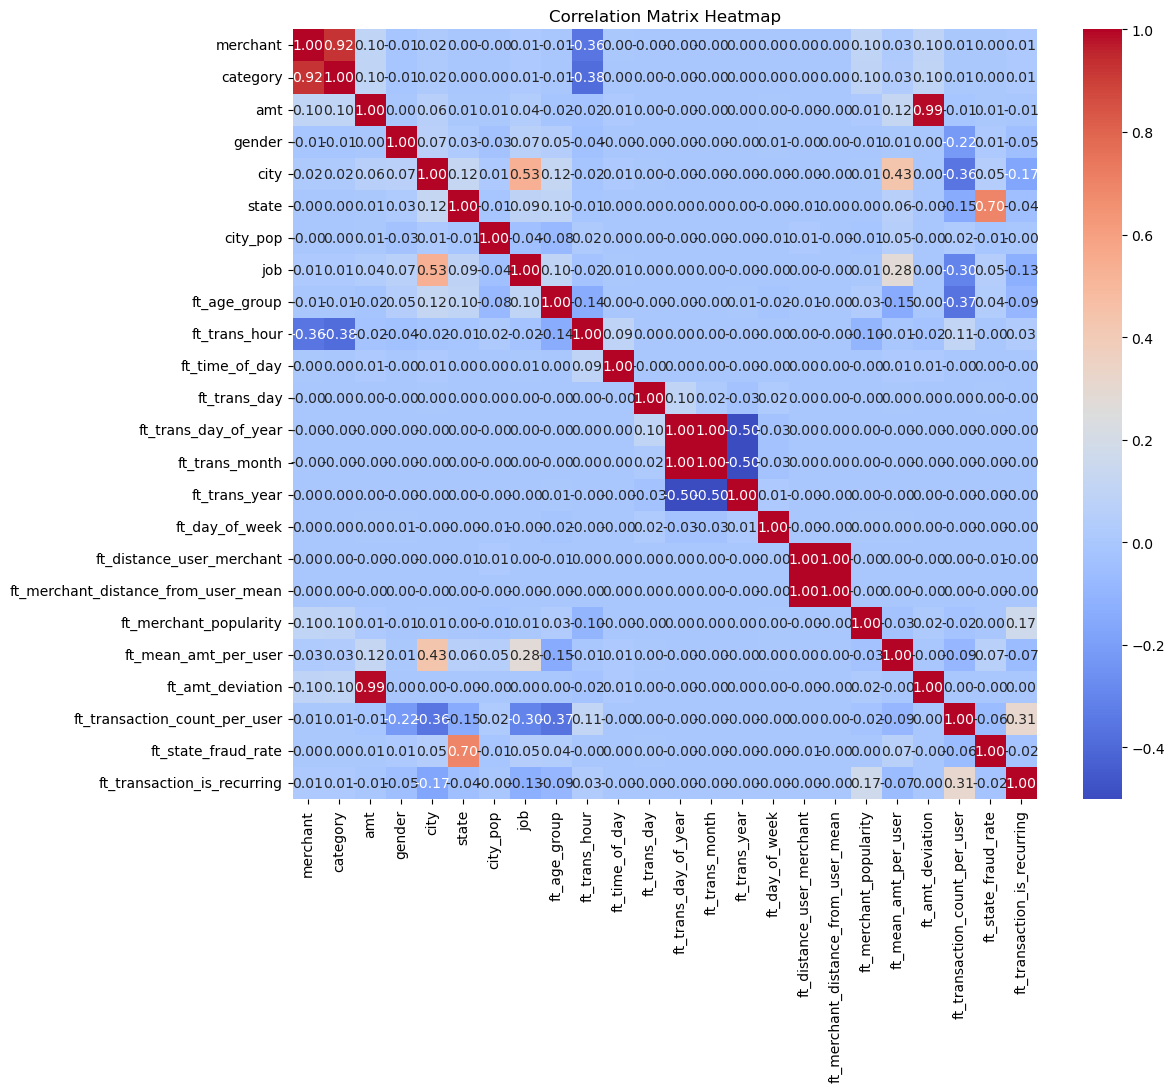

Highly Correlated Feature Pairs:
                               Feature_1                            Feature_2  \
1                               merchant                             category   
24                              category                             merchant   
68                                   amt                     ft_amt_deviation   
301                 ft_trans_day_of_year                       ft_trans_month   
324                       ft_trans_month                 ft_trans_day_of_year   
401            ft_distance_user_merchant  ft_merchant_distance_from_user_mean   
424  ft_merchant_distance_from_user_mean            ft_distance_user_merchant   
482                     ft_amt_deviation                                  amt   

     Correlation  
1       0.924054  
24      0.924054  
68      0.992205  
301     0.996813  
324     0.996813  
401     0.996967  
424     0.996967  
482     0.992205  


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the encoded training data
correlation_matrix = X_train_encoded.corr()

# Save the correlation matrix as a CSV file if needed
correlation_matrix.to_csv("correlation_matrix.csv", index=True)
print("Correlation matrix saved as 'correlation_matrix.csv'")

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify highly correlated features (optional)
threshold = 0.75  # Adjust threshold as needed
high_correlation_pairs = correlation_matrix.unstack().reset_index()
high_correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[
    (high_correlation_pairs['Correlation'] > threshold) & 
    (high_correlation_pairs['Feature_1'] != high_correlation_pairs['Feature_2'])
]

print("Highly Correlated Feature Pairs:")
print(high_correlation_pairs)

## Feature Importance analysis

In [25]:
# # CatBoost
# from catboost import CatBoostClassifier
# from sklearn.metrics import balanced_accuracy_score

In [26]:
# # Initialize CatBoostClassifier
# model = CatBoostClassifier(depth=7, iterations=100, random_seed=13, verbose=0)

In [27]:
# # Fit the model
# model.fit(X_train_encoded, y_train)

In [28]:
# # Make predictions on the training set
# y_train_pred = model.predict(X_train_encoded)
# print("Balanced Accuracy Score on Training Set:", balanced_accuracy_score(y_train, y_train_pred))

# # Make predictions on the test set
# y_validation_pred = model.predict(X_val_encoded)
# print("Balanced Accuracy Score on Validation Set:", balanced_accuracy_score(y_val, y_validation_pred))

Balanced Accuracy Score on Training Set: 0.9515222500462015
Balanced Accuracy Score on Validation Set: 0.9108480687401809


In [30]:
# # AdaBoost
# a = AdaBoostClassifier(random_state=42)
# a.fit(X_train_encoded, y_train)
# a_train_predict = a.predict(X_train_encoded)
# a_val_predict = a.predict(X_val_encoded)
# # a_test_predict = a.predict(X_test_encoded)
# print(balanced_accuracy_score(y_train,a_train_predict))
# print(balanced_accuracy_score(y_val,a_val_predict))
# # print(accuracy_score(y_test,a_test_predict))

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7423230375907983
0.7360257077826567


In [43]:
!pip install xgboost

python(7416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.8 MB/s eta 0:00:00a 0:00:01


In [44]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [45]:
# Step 1: Convert data into DMatrix (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train_encoded, label=y_train)
dval = xgb.DMatrix(X_val_encoded, label=y_val)

# Step 2: Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'auc',           # Metric to evaluate during training
    'max_depth': 6,                 # Tree depth
    'eta': 0.1,                     # Learning rate
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8,        # Feature sampling ratio
    'seed': 42                      # Seed for reproducibility
}

# Step 3: Train the XGBoost model
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=100, 
    evals=[(dval, 'validation')], 
    early_stopping_rounds=10,       # Stops if validation AUC doesn't improve
    verbose_eval=10
)

[0]	validation-auc:0.95965
[10]	validation-auc:0.98735
[20]	validation-auc:0.99133
[30]	validation-auc:0.99468
[40]	validation-auc:0.99575
[50]	validation-auc:0.99637
[60]	validation-auc:0.99631
[65]	validation-auc:0.99631


In [46]:
# Retrieve feature importance
feature_importance = model.get_score(importance_type='weight')  # Options: 'weight', 'gain', 'cover'

# Sort feature importance
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
print("Feature Importance Ranking:")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")

Feature Importance Ranking:
amt: 456.0
ft_merchant_popularity: 316.0
category: 286.0
city: 279.0
ft_trans_hour: 266.0
ft_amt_deviation: 170.0
ft_mean_amt_per_user: 151.0
merchant: 119.0
ft_age_group: 119.0
city_pop: 107.0
ft_transaction_count_per_user: 100.0
job: 73.0
ft_trans_day_of_year: 63.0
ft_trans_day: 36.0
gender: 33.0
ft_distance_user_merchant: 30.0
ft_time_of_day: 25.0
ft_day_of_week: 19.0
ft_merchant_distance_from_user_mean: 16.0
state: 15.0
ft_state_fraud_rate: 14.0
ft_trans_month: 5.0
ft_trans_year: 2.0
ft_transaction_is_recurring: 1.0


<Figure size 2000x1600 with 0 Axes>

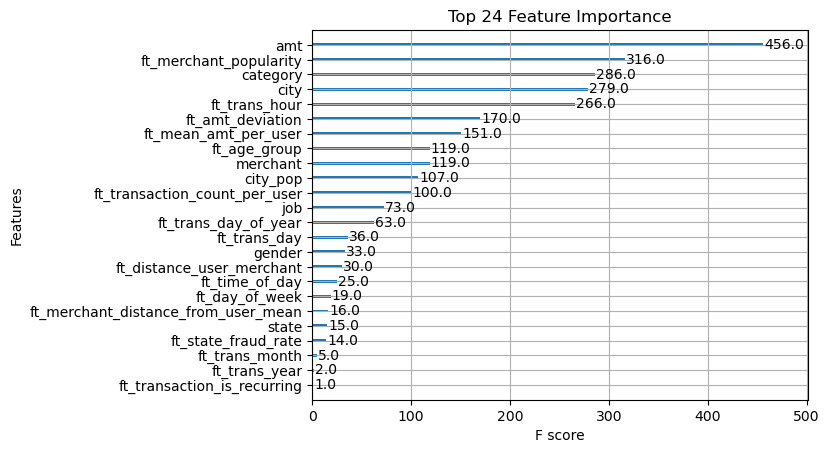

In [49]:
# Plot feature importance
plt.figure(figsize=(20, 16))
plot_importance(model, importance_type='weight', max_num_features=24)  # Top 10 features
plt.title("Top 24 Feature Importance")
plt.show()

## Analysis based on Correlation and Feature Importance (this needs to be evaluated with business)
    
1.	Retain the Most Important Features:
	•	Retain amt, ft_merchant_popularity, category, city, and ft_trans_hour because they are critical based on their F-scores.
2.	Based on business decision - Drop Highly Correlated Redundant Features:
	•	Drop ft_amt_deviation because it is highly correlated with amt, which has a much higher importance score.
	•	Drop ft_trans_day_of_year because it is highly correlated with ft_trans_month and has a lower importance score.
3.	Drop Low Importance Features:
	•	Drop features like ft_trans_year, ft_trans_month, and ft_transaction_is_recurring unless domain knowledge suggests they add unique value.
4.	Evaluate Marginal Features:
	•	Features like gender, state, and ft_merchant_distance_from_user_mean have low importance scores and no significant correlation with critical features. These can be evaluated by testing model performance with and without them.

## Steps to move forward:
1. Define the metric to evaluate the model
2. Baseline model with all the features
3. Ex: Drop 7 least important features - model and compare result
4. Ex: Drop 6 more (total 13) least important features - model and compare result
5. Iterate more if necessary
6. Based on the best result, keep the features and move to hyper parameter tuning of the model

## Define the Metric

## Modeling to get ideal features
1. Baseline Model
2. Check and fix for Data Leakage
3. Iterate to get best number of Features

## Modeling to get the best hyper-parameter tuned model